## Pre-Modelling

This notebook will deal with further data preprocessing, encoding categorical variables, feature scaling and checking for multicollinearity and variance inflation factor (VIF) scores for feautre selection.

Before building our models, we have to ensure that the data is processed and scaled to ensure optimal performance and accurate predictions. We have already cleaned and feature engineered our data, so we will now focus on feature scaling and selection before we run our models.

In [1]:
import pandas as pd
import ast
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

We first load the dataset and check if there are any other missing values that we did not manage to handle in previous steps.

In [2]:
hdb_data = pd.read_csv('../data/modified/hdb_working_data.csv')
hdb_data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,latitude,longitude,sora,nearest_mrt_station,bto_within_4km,bto_supply_within_4km,count_pri_schs_within_1km,distance2cbd,poi_mrt_prisch_mall,poi_vector
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70.0,...,1.375097,103.837619,0.129019,Yio Chu Kang MRT Station (1099.56m),12,6587,3,9.764087,Ang Mo Kio Primary School (676.95m) CHIJ St. ...,[-3.3962243e+00 -4.0309663e+00 3.7387407e+00 ...
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65.0,...,1.373922,103.855621,0.129019,Ang Mo Kio MRT Station (811.53m),39,23252,1,9.515643,Ang Mo Kio MRT Station (811.53m) Jing Shan Pri...,[-3.4233415 -4.574654 3.5261717 -0.558677...
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64.0,...,1.373552,103.838169,0.129019,Yio Chu Kang MRT Station (1183.8m),10,4941,3,9.585589,Ang Mo Kio Primary School (495.36m) CHIJ St. ...,[-3.3962243e+00 -4.0309663e+00 3.7387407e+00 ...
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63.0,...,1.367761,103.855357,0.129019,Ang Mo Kio MRT Station (703.32m),34,20043,3,8.833708,Ang Mo Kio MRT Station (703.32m) Jing Shan Pri...,[-3.2633016e+00 -4.6608467e+00 3.5853505e+00 ...
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64.0,...,1.371626,103.857736,0.129019,Ang Mo Kio MRT Station (939.42m),45,26356,1,9.275781,Ang Mo Kio MRT Station (939.42m) Jing Shan Pri...,[-3.4233415 -4.574654 3.5261717 -0.558677...


In [3]:
# check for missing values
hdb_data.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
remaining_lease              14306
resale_price                     0
address                          0
latitude                         0
longitude                        0
sora                             0
nearest_mrt_station              0
bto_within_4km                   0
bto_supply_within_4km            0
count_pri_schs_within_1km        0
distance2cbd                     0
poi_mrt_prisch_mall              0
poi_vector                       0
dtype: int64

There are still missing values for the `remaining_lease` column. We can replace these missing values with the median of the respective `town`.

In [4]:
hdb_data['remaining_lease'] = hdb_data.groupby('town')['remaining_lease'].transform(lambda x: x.fillna(x.mean()))
hdb_data.isnull().sum()

month                        0
town                         0
flat_type                    0
block                        0
street_name                  0
storey_range                 0
floor_area_sqm               0
flat_model                   0
lease_commence_date          0
remaining_lease              0
resale_price                 0
address                      0
latitude                     0
longitude                    0
sora                         0
nearest_mrt_station          0
bto_within_4km               0
bto_supply_within_4km        0
count_pri_schs_within_1km    0
distance2cbd                 0
poi_mrt_prisch_mall          0
poi_vector                   0
dtype: int64

Now that there are no more missing values, we can proceed to check the datatypes of the data that we are working with.

In [5]:
hdb_data.dtypes

month                         object
town                          object
flat_type                     object
block                         object
street_name                   object
storey_range                  object
floor_area_sqm               float64
flat_model                    object
lease_commence_date            int64
remaining_lease              float64
resale_price                 float64
address                       object
latitude                     float64
longitude                    float64
sora                         float64
nearest_mrt_station           object
bto_within_4km                 int64
bto_supply_within_4km          int64
count_pri_schs_within_1km      int64
distance2cbd                 float64
poi_mrt_prisch_mall           object
poi_vector                    object
dtype: object

For `month` e.g. (2015-01), we can retain the year so that we can work with integers.

In [6]:
hdb_data['year'] = pd.DatetimeIndex(hdb_data['month']).year
# drop month column
hdb_data.drop('month', axis=1, inplace=True)
hdb_data.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,...,longitude,sora,nearest_mrt_station,bto_within_4km,bto_supply_within_4km,count_pri_schs_within_1km,distance2cbd,poi_mrt_prisch_mall,poi_vector,year
0,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70.0,255000.0,...,103.837619,0.129019,Yio Chu Kang MRT Station (1099.56m),12,6587,3,9.764087,Ang Mo Kio Primary School (676.95m) CHIJ St. ...,[-3.3962243e+00 -4.0309663e+00 3.7387407e+00 ...,2015
1,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65.0,275000.0,...,103.855621,0.129019,Ang Mo Kio MRT Station (811.53m),39,23252,1,9.515643,Ang Mo Kio MRT Station (811.53m) Jing Shan Pri...,[-3.4233415 -4.574654 3.5261717 -0.558677...,2015
2,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64.0,285000.0,...,103.838169,0.129019,Yio Chu Kang MRT Station (1183.8m),10,4941,3,9.585589,Ang Mo Kio Primary School (495.36m) CHIJ St. ...,[-3.3962243e+00 -4.0309663e+00 3.7387407e+00 ...,2015
3,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63.0,290000.0,...,103.855357,0.129019,Ang Mo Kio MRT Station (703.32m),34,20043,3,8.833708,Ang Mo Kio MRT Station (703.32m) Jing Shan Pri...,[-3.2633016e+00 -4.6608467e+00 3.5853505e+00 ...,2015
4,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64.0,290000.0,...,103.857736,0.129019,Ang Mo Kio MRT Station (939.42m),45,26356,1,9.275781,Ang Mo Kio MRT Station (939.42m) Jing Shan Pri...,[-3.4233415 -4.574654 3.5261717 -0.558677...,2015


Note that in pandas, the `str` data type is stored as `object`. We can check the type of `poi_vector` since it is supposed to be a vector (numpy ndarry).

In [7]:
print(type(hdb_data.iloc[0]['poi_vector']))

<class 'str'>


We can now convert the `poi_vector` to its literal.

In [8]:
# convert poi_vector to numpy array
hdb_data['poi_vector'] = hdb_data['poi_vector'].apply(lambda x: np.fromstring(x.strip('[]'), sep=' '))
print(type(hdb_data.iloc[0]['poi_vector']))

<class 'numpy.ndarray'>


#### Label Encoding and One Hot Encoding

We can label encode categorical variables - `storey_range`, `flat_type`, `flat_model`.

In [9]:
hdb_data['storey_range'].value_counts()

storey_range
04 TO 06    49041
07 TO 09    44766
10 TO 12    39643
01 TO 03    37712
13 TO 15    19860
16 TO 18     9153
19 TO 21     3858
22 TO 24     2781
25 TO 27     1642
28 TO 30     1067
31 TO 33      557
34 TO 36      513
37 TO 39      451
40 TO 42      221
43 TO 45       64
46 TO 48       49
49 TO 51       17
Name: count, dtype: int64

In [10]:
label_encoder = LabelEncoder()
hdb_data['storey_range'] = label_encoder.fit_transform(hdb_data['storey_range'])
hdb_data['storey_range'].value_counts()

storey_range
1     49041
2     44766
3     39643
0     37712
4     19860
5      9153
6      3858
7      2781
8      1642
9      1067
10      557
11      513
12      451
13      221
14       64
15       49
16       17
Name: count, dtype: int64

In [11]:
hdb_data['flat_type'].value_counts()

flat_type
4 ROOM              88669
5 ROOM              52178
3 ROOM              51157
EXECUTIVE           15865
2 ROOM               3366
MULTI-GENERATION       82
1 ROOM                 78
Name: count, dtype: int64

In [12]:
hdb_data['flat_type'] = label_encoder.fit_transform(hdb_data['flat_type'])
hdb_data['flat_type'].value_counts()

flat_type
3    88669
4    52178
2    51157
5    15865
1     3366
6       82
0       78
Name: count, dtype: int64

In [13]:
hdb_data['flat_model'].value_counts()

flat_model
Model A                   71530
Improved                  52441
New Generation            28025
Premium Apartment         23293
Simplified                 8592
Apartment                  7945
Maisonette                 6013
Standard                   5964
DBSS                       3169
Model A2                   2579
Type S1                     430
Model A-Maisonette          383
Adjoined flat               356
Type S2                     214
Terrace                     118
Premium Apartment Loft      107
Multi Generation             82
2-room                       81
Improved-Maisonette          29
3Gen                         28
Premium Maisonette           16
Name: count, dtype: int64

We can recategorise `flat_model` into broader categories. Notice that there are 4 types of mansionettes, so we can consider grouping the mansionettes together. We can also grouo Multi Generation, 2-room and 3Gen together as well since they have relatively low counts.

In [14]:
group = {'Model A-Maisonette':'Maisonette', 'Improved-Maisonette':'Maisonette', 'Premium Maisonette':'Maisonette', 
         'Multi Generation': 'Others', '2-room': 'Others', '3Gen': 'Others',}
hdb_data = hdb_data.replace({'flat_model': group})
hdb_data['flat_model'].value_counts()

flat_model
Model A                   71530
Improved                  52441
New Generation            28025
Premium Apartment         23293
Simplified                 8592
Apartment                  7945
Maisonette                 6441
Standard                   5964
DBSS                       3169
Model A2                   2579
Type S1                     430
Adjoined flat               356
Type S2                     214
Others                      191
Terrace                     118
Premium Apartment Loft      107
Name: count, dtype: int64

Now we create the dummy variables using one hot encoding, we can use pandas's `get_dummies` to achieve this. We do this for `town` and `flat_model`.

In [15]:
print(hdb_data['town'].sort_values().unique())
print(hdb_data['flat_model'].sort_values().unique())    

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']
['Adjoined flat' 'Apartment' 'DBSS' 'Improved' 'Maisonette' 'Model A'
 'Model A2' 'New Generation' 'Others' 'Premium Apartment'
 'Premium Apartment Loft' 'Simplified' 'Standard' 'Terrace' 'Type S1'
 'Type S2']


In [16]:
hdb_data = pd.get_dummies(hdb_data, columns = ['town','flat_model'],drop_first = True, dtype=np.int8)
hdb_data.columns

Index(['flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm',
       'lease_commence_date', 'remaining_lease', 'resale_price', 'address',
       'latitude', 'longitude', 'sora', 'nearest_mrt_station',
       'bto_within_4km', 'bto_supply_within_4km', 'count_pri_schs_within_1km',
       'distance2cbd', 'poi_mrt_prisch_mall', 'poi_vector', 'year',
       'town_BEDOK', 'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_model_Apartment', 'flat_model_DBSS', 'flat_model_Improved',
       'flat_model_Maisonette', 'flat_model_Model A

ANG MO KIO from `town` and Adjoined flat from `flat_model` have been selected as the baseline to which the other classes are compared to. This is to also minimise issues of multicollinearity.

In [17]:
hdb_data.dtypes

flat_type                              int64
block                                 object
street_name                           object
storey_range                           int64
floor_area_sqm                       float64
lease_commence_date                    int64
remaining_lease                      float64
resale_price                         float64
address                               object
latitude                             float64
longitude                            float64
sora                                 float64
nearest_mrt_station                   object
bto_within_4km                         int64
bto_supply_within_4km                  int64
count_pri_schs_within_1km              int64
distance2cbd                         float64
poi_mrt_prisch_mall                   object
poi_vector                            object
year                                   int32
town_BEDOK                              int8
town_BISHAN                             int8
town_BUKIT

In [18]:
hdb_data['year'] = hdb_data['year'].astype('int64')
hdb_data.head()

,flat_type,block,street_name,storey_range,floor_area_sqm,lease_commence_date,remaining_lease,resale_price,address,latitude,...,flat_model_Model A2,flat_model_New Generation,flat_model_Others,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,2,174,ANG MO KIO AVE 4,2,60.0,1986,70.0,255000.0,174 ANG MO KIO AVE 4,1.375097,...,0,0,0,0,0,0,0,0,0,0
1,2,541,ANG MO KIO AVE 10,0,68.0,1981,65.0,275000.0,541 ANG MO KIO AVE 10,1.373922,...,0,1,0,0,0,0,0,0,0,0
2,2,163,ANG MO KIO AVE 4,0,69.0,1980,64.0,285000.0,163 ANG MO KIO AVE 4,1.373552,...,0,1,0,0,0,0,0,0,0,0
3,2,446,ANG MO KIO AVE 10,0,68.0,1979,63.0,290000.0,446 ANG MO KIO AVE 10,1.367761,...,0,1,0,0,0,0,0,0,0,0
4,2,557,ANG MO KIO AVE 10,2,68.0,1980,64.0,290000.0,557 ANG MO KIO AVE 10,1.371626,...,0,1,0,0,0,0,0,0,0,0


#### Log normalisation of resale prices

One thing that we noticed in our exploratory data analysis was that the distribution of resale prices was slightly skewed to the left. To address this , we will apply log normalisation.

In [19]:
hdb_data['resale_price'] = np.log(hdb_data['resale_price'])

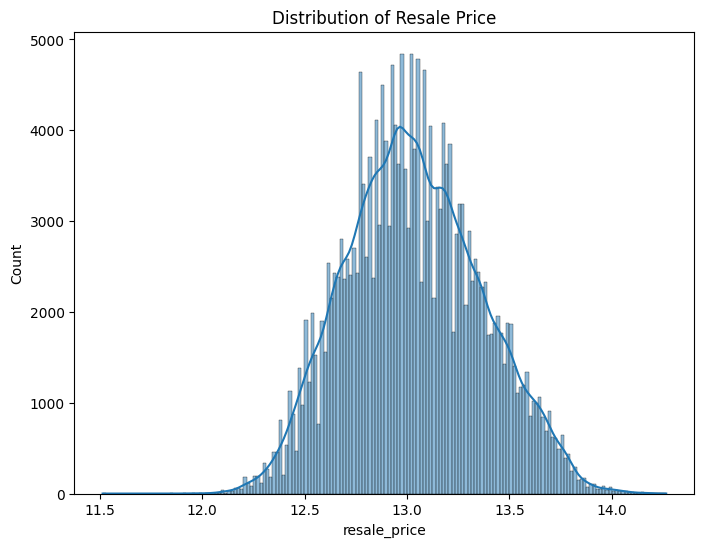

In [20]:
# plot distribution of resale price after log transformation
plt.figure(figsize=(8,6))
sns.histplot(hdb_data['resale_price'], kde=True)
plt.title('Distribution of Resale Price')
plt.show()

#### Checking for Multicollinearity and VIF-scores

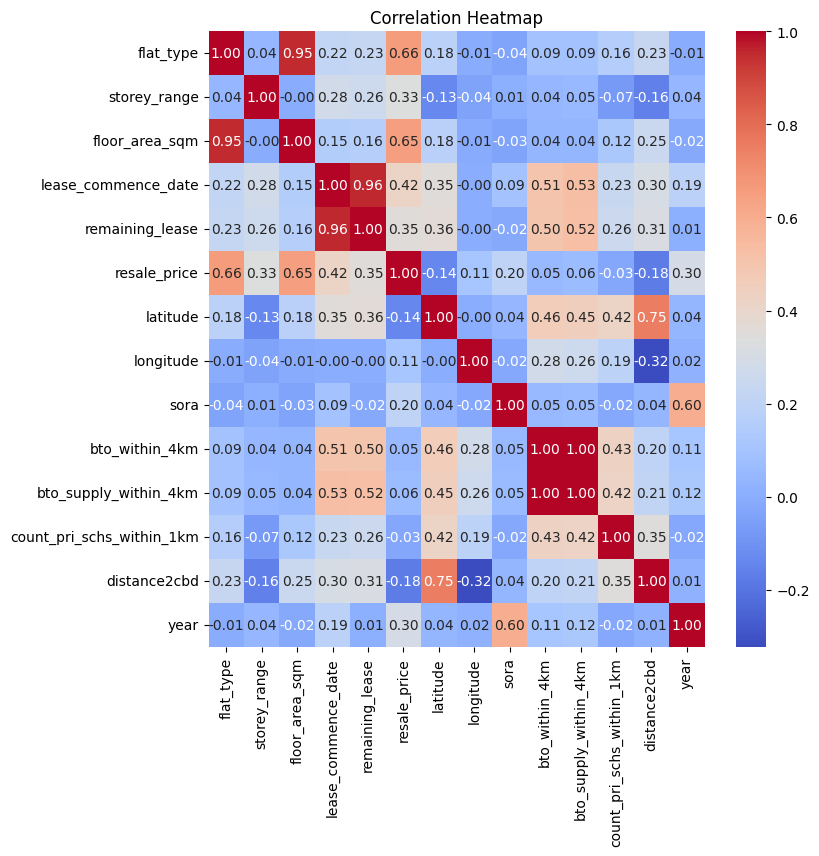

In [21]:
# plot the correlation heatmap, only for numerical columns
plt.figure(figsize=(8,8))
sns.heatmap(hdb_data.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

We will take a look at the correlations >= 0.6.

From the correlation heatmap, while placing the correlations with resale price aside:
- There is a high correlation between `flat_type` and `floor_area_sqm` (0.95)
- There is a high correlation between `lease_commence_date` and `remaining_lease` (0.96)
- There is a perfect correlation between `bto_within_4km` and `bto_supply_within_4km` (1.00)
- There is a relatively high correlation between `sora` and `year` (0.60)
- There is a high correlation between `latitude` and `distance2cbd` (0.75)

We shall now take a look at the VIF-scores.

In [22]:
# function to calculate VIF
def vif_scrore(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_data['tolerance'] = 1/vif_data['VIF']
    vif_data['meanVIF'] = vif_data['VIF'].mean()
    return vif_data

# calculate VIF
vif_scrored = vif_scrore(hdb_data.drop('resale_price', axis=1).select_dtypes(include=['int64', 'float64']))
vif_scrored

,feature,VIF,tolerance,meanVIF
0,flat_type,1.440328e+02,6.942864e-03,180983.345349
1,storey_range,2.757277e+00,3.626766e-01,180983.345349
2,floor_area_sqm,1.964583e+02,5.090139e-03,180983.345349
3,lease_commence_date,4.414518e+05,2.265253e-06,180983.345349
4,remaining_lease,6.629333e+02,1.508447e-03,180983.345349
5,latitude,3.435580e+03,2.910717e-04,180983.345349
6,longitude,7.747236e+05,1.290783e-06,180983.345349
7,sora,2.669314e+00,3.746281e-01,180983.345349
8,bto_within_4km,4.118471e+02,2.428086e-03,180983.345349
9,bto_supply_within_4km,3.870329e+02,2.583759e-03,180983.345349


According to [Myers (1990)](http://llrc.mcast.edu.mt/digitalversion/Table_of_Contents_127495.pdf), a VIF-score that is more than 10 indicates strong multicollinearity. 

By considering the VIF scores and the correlations identified in the correlation heatmap, the variables that we definitely can drop are:
- `lease_commence_date` 
- `longitude`
- `latitude` 
- `year`
- `flat_type`
- `bto_within_4km`

We decided to retain `floor_area_sqm`, `remaining_lease`, `bto_supply_within_4km`, `distance2cbd` since we believe that they might be significant factors in determining HDB resale prices. 

In [23]:
dropped_cols = ['lease_commence_date', 'longitude', 'latitude', 'year', 'flat_type', 'bto_within_4km']

In addition, we can also drop the `block` and `street_name` since we already have `address`.

We can also drop  `nearest_mrt_station`, `poi_mrt_prisch_mall`, `count_pri_schs_within_1km` and `address` due to the following reasons:

- `address` can be captured by the encoded `town`
- `poi_vector`, being a word-embedded vector, encodes relevant information about proximity and density of nearby MRT stations, primary schools and shopping malls, which are related to `nearest_mrt_station` and `poi_mrt_prisch_mall` and `count_pri_schs_within_1km`

Dropping these variables can help to streamline the dataset and reduce the number of features while still retaining relevant information.

In [24]:
dropped_cols.extend(['block', 'street_name', 'address', 'nearest_mrt_station', 'poi_mrt_prisch_mall', 'count_pri_schs_within_1km'])
dropped_cols

['lease_commence_date',
 'longitude',
 'latitude',
 'year',
 'flat_type',
 'bto_within_4km',
 'block',
 'street_name',
 'address',
 'nearest_mrt_station',
 'poi_mrt_prisch_mall',
 'count_pri_schs_within_1km']

But before we drop `year`, we can segment the 2024 data out first since we are likely to use the data related to 2024 later for model evaluation.

In [25]:
data_2024 = hdb_data[hdb_data['year'] == 2024]
hdb_data = hdb_data[hdb_data['year'] != 2024]

print(data_2024.shape)
print(hdb_data.shape)

(5080, 60)
(206315, 60)


In [26]:
# drop the dropped columns
hdb_data.drop(dropped_cols, axis=1, inplace=True)
print(hdb_data.shape)
hdb_data.head()

(206315, 48)


,storey_range,floor_area_sqm,remaining_lease,resale_price,sora,bto_supply_within_4km,distance2cbd,poi_vector,town_BEDOK,town_BISHAN,...,flat_model_Model A2,flat_model_New Generation,flat_model_Others,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
0,2,60.0,70.0,12.449019,0.129019,6587,9.764087,"[-3.3962243, -4.0309663, 3.7387407, -0.5263652...",0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,68.0,65.0,12.524526,0.129019,23252,9.515643,"[-3.4233415, -4.574654, 3.5261717, -0.5586772,...",0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,69.0,64.0,12.560244,0.129019,4941,9.585589,"[-3.3962243, -4.0309663, 3.7387407, -0.5263652...",0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,68.0,63.0,12.577636,0.129019,20043,8.833708,"[-3.2633016, -4.6608467, 3.5853505, -0.1924801...",0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,68.0,64.0,12.577636,0.129019,26356,9.275781,"[-3.4233415, -4.574654, 3.5261717, -0.5586772,...",0,0,...,0,1,0,0,0,0,0,0,0,0


#### Feature Scaling

Scale numerical columns that are continuous in nature.

In [27]:
hdb_data.dtypes

storey_range                           int64
floor_area_sqm                       float64
remaining_lease                      float64
resale_price                         float64
sora                                 float64
bto_supply_within_4km                  int64
distance2cbd                         float64
poi_vector                            object
town_BEDOK                              int8
town_BISHAN                             int8
town_BUKIT BATOK                        int8
town_BUKIT MERAH                        int8
town_BUKIT PANJANG                      int8
town_BUKIT TIMAH                        int8
town_CENTRAL AREA                       int8
town_CHOA CHU KANG                      int8
town_CLEMENTI                           int8
town_GEYLANG                            int8
town_HOUGANG                            int8
town_JURONG EAST                        int8
town_JURONG WEST                        int8
town_KALLANG/WHAMPOA                    int8
town_MARIN

In [28]:
numerical_cols = ['floor_area_sqm', 'remaining_lease', 'sora', 'bto_supply_within_4km', 'distance2cbd']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(hdb_data[numerical_cols])

# create a dataframe of scaled features
scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_cols)

# drop the original numerical columns
hdb_data = hdb_data.drop(numerical_cols, axis=1)

# merge the scaled features with the original dataframe
hdb_data = pd.concat([hdb_data, scaled_features_df], axis=1)

hdb_data.head()

,storey_range,resale_price,poi_vector,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,...,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2,floor_area_sqm,remaining_lease,sora,bto_supply_within_4km,distance2cbd
0,2,12.449019,"[-3.3962243, -4.0309663, 3.7387407, -0.5263652...",0,0,0,0,0,0,0,...,0,0,0,0,0,-1.548031,-0.347419,-0.787221,-0.830497,-0.521884
1,0,12.524526,"[-3.4233415, -4.574654, 3.5261717, -0.5586772,...",0,0,0,0,0,0,0,...,0,0,0,0,0,-1.215427,-0.731009,-0.787221,-0.164072,-0.578866
2,0,12.560244,"[-3.3962243, -4.0309663, 3.7387407, -0.5263652...",0,0,0,0,0,0,0,...,0,0,0,0,0,-1.173851,-0.807728,-0.787221,-0.896320,-0.562823
3,0,12.577636,"[-3.2633016, -4.6608467, 3.5853505, -0.1924801...",0,0,0,0,0,0,0,...,0,0,0,0,0,-1.215427,-0.884446,-0.787221,-0.292398,-0.735271
4,2,12.577636,"[-3.4233415, -4.574654, 3.5261717, -0.5586772,...",0,0,0,0,0,0,0,...,0,0,0,0,0,-1.215427,-0.807728,-0.787221,-0.039945,-0.633879


#### Train Test Splitting

We have already segmented out the 2024 data (stored in `data_2024` which we will be using to evaluate our models at the end too), we can then use the `train_test_split` function from `sklearn` to split the remaining data into training and test sets. 

In [35]:
y_values = hdb_data['resale_price']
X_values = hdb_data.drop('resale_price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_values, y_values, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

165052 41263
165052 41263
(165052, 47) (41263, 47)
(165052,) (41263,)
